In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path="../output_videos/cropped_image.jpg"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

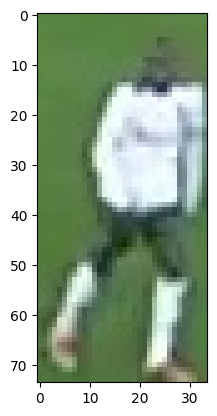

In [6]:
plt.imshow(image)
plt.show()


# Take the top half of image

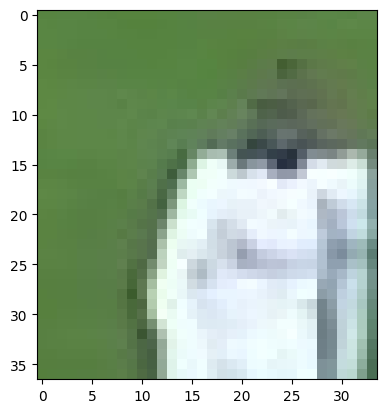

In [8]:
top_half_image=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()

#cluster the image into two clusters

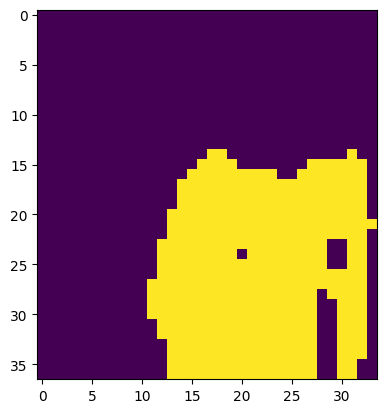

In [14]:
#Reshape the image to a 2D array of pixels
image_2d=top_half_image.reshape((-1,3))

#perform k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)

#Get the cluster labels for each pixel
labels = kmeans.labels_

#reshape the labels to the original image shape
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

#Display the clustered image
plt.imshow(clustered_image)
plt.show()

In [35]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters), key=corner_clusters.count) 
print(non_player_cluster)

0


In [36]:
player_cluster=1-non_player_cluster
print(player_cluster)

1


In [37]:
kmeans.cluster_centers_[player_cluster]

array([217.66987952, 231.83373494, 235.98313253])

In [38]:
kmeans.cluster_centers_[non_player_cluster]

array([ 91.95017794, 127.21115065,  77.72479241])

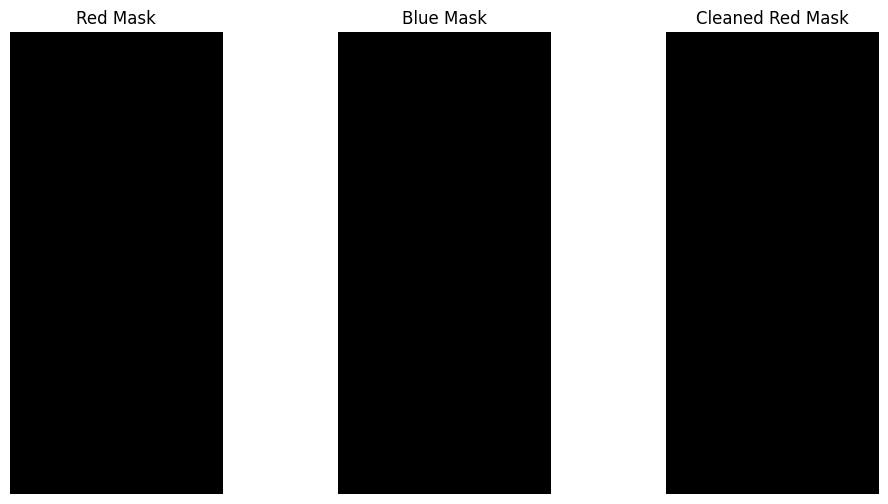

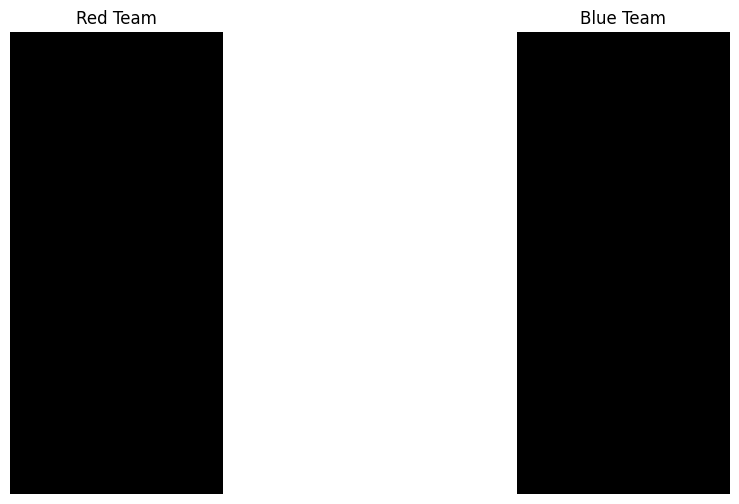

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (frame from video)
image = cv2.imread("../output_videos/cropped_image.jpg")

# Check if the image is loaded successfully
if image is None:
    print("Error: Could not load image. Please check the file path.")
else:
    # Convert the image to HSV (better for color-based segmentation)
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define the HSV range for the red team (lower and upper bounds)
    # Red wraps around 0-180 degrees in Hue, so we use two ranges for detection
    lower_red1 = np.array([0, 70, 50])  # Lower red
    upper_red1 = np.array([10, 255, 255])  # Upper red
    lower_red2 = np.array([170, 70, 50])  # Lower red (other side of the hue circle)
    upper_red2 = np.array([180, 255, 255])  # Upper red

    # Define the HSV range for the blue team
    lower_blue = np.array([100, 150, 0])  # Lower blue
    upper_blue = np.array([140, 255, 255])  # Upper blue

    # Create masks for the red and blue teams
    mask_red1 = cv2.inRange(image_hsv, lower_red1, upper_red1)
    mask_red2 = cv2.inRange(image_hsv, lower_red2, upper_red2)
    mask_red = cv2.bitwise_or(mask_red1, mask_red2)  # Combine the two red ranges

    mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)

    # Visualize the masks to understand what is being detected
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.imshow(mask_red, cmap='gray')
    plt.title("Red Mask")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(mask_blue, cmap='gray')
    plt.title("Blue Mask")
    plt.axis("off")

    # Apply morphological operations to remove noise (optional)
    kernel = np.ones((5, 5), np.uint8)
    mask_red_cleaned = cv2.morphologyEx(mask_red, cv2.MORPH_CLOSE, kernel)
    mask_blue_cleaned = cv2.morphologyEx(mask_blue, cv2.MORPH_CLOSE, kernel)

    # Show cleaned masks
    plt.subplot(1, 3, 3)
    plt.imshow(mask_red_cleaned, cmap='gray')
    plt.title("Cleaned Red Mask")
    plt.axis("off")
    
    plt.show()

    # Now, apply the cleaned masks to extract the red and blue teams
    red_team = cv2.bitwise_and(image, image, mask=mask_red_cleaned)
    blue_team = cv2.bitwise_and(image, image, mask=mask_blue_cleaned)

    # Convert the results to RGB for displaying with matplotlib
    red_team_rgb = cv2.cvtColor(red_team, cv2.COLOR_BGR2RGB)
    blue_team_rgb = cv2.cvtColor(blue_team, cv2.COLOR_BGR2RGB)

    # Display the results
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(red_team_rgb)
    plt.title("Red Team")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(blue_team_rgb)
    plt.title("Blue Team")
    plt.axis("off")

    plt.show()
